In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## **1. OpenCV Basics**

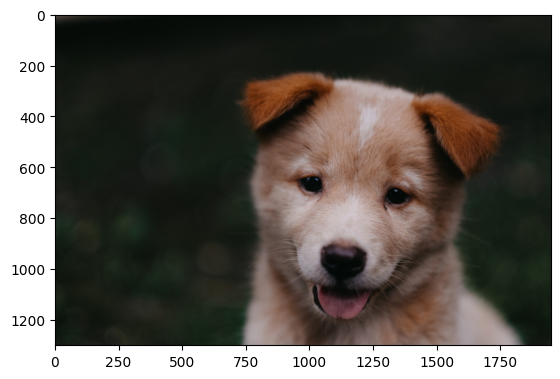

In [2]:
img = cv2.imread("./data/00-puppy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

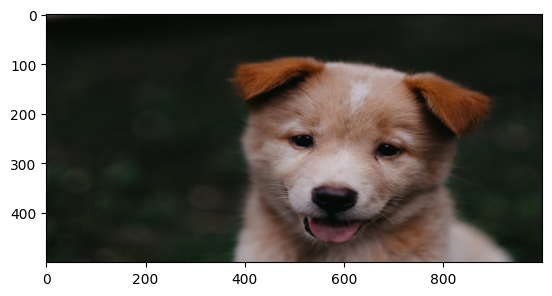

In [3]:
# Image shape is a numpy array with 3 values: height, width, and color channels.
# But when we pass args to cv2.resize, we pass these as (width, height).
# So it's a little confusing.
img_resized = cv2.resize(img, (1000, 500))
plt.imshow(img_resized)
plt.show()

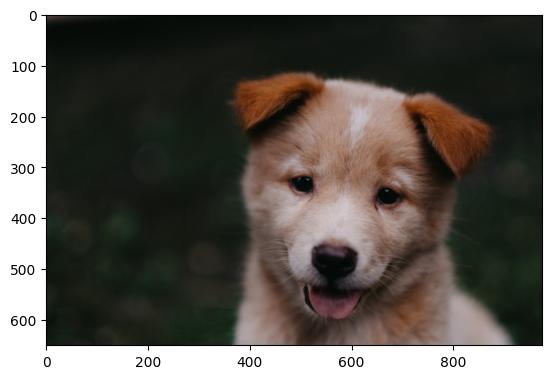

In [4]:
# We can also resize by a factor.
img_resized = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(img_resized)
plt.show()

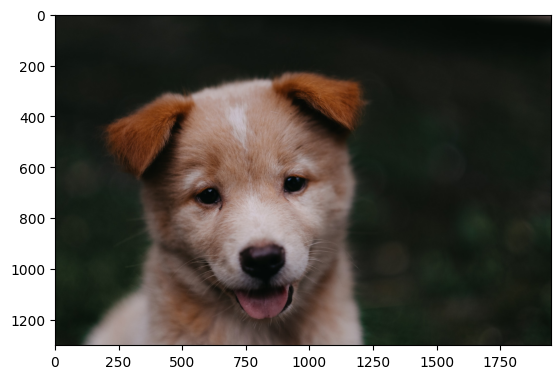

In [5]:
img_flipped = cv2.flip(img, 1)
plt.imshow(img_flipped)
plt.show()

In [6]:
img = cv2.imread("./data/00-puppy.jpg")
cv2.imshow("Puppy", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
img = cv2.imread("./data/00-puppy.jpg")

while True:
    cv2.imshow("Puppy", cv2.resize(img, None, fx=0.25, fy=0.25))
    key = cv2.waitKey(1)  # Wait 1 ms for a key press and return ASCII value of that key.
    if key == ord("q"):
        break

cv2.destroyAllWindows()

## **2. Drawing**

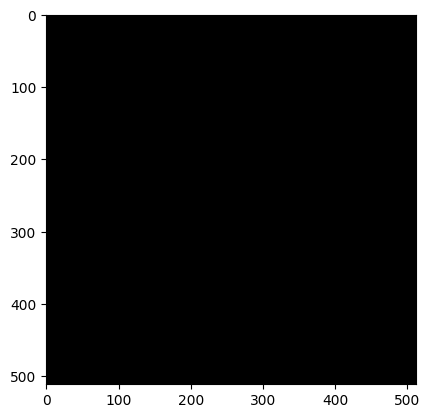

In [8]:
blank = np.zeros((512, 512, 3), dtype="uint8")
plt.imshow(blank)
plt.show()

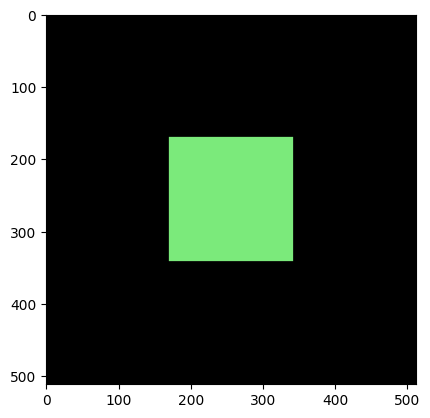

In [9]:
# Works in-place.
pt1 = (512 // 3, 512 // 3)
pt2 = (2 * 512 // 3, 2 * 512 // 3)
cv2.rectangle(blank, pt1=pt1, pt2=pt2, color=(123, 234, 123), thickness=cv2.FILLED)
plt.imshow(blank)
plt.show()

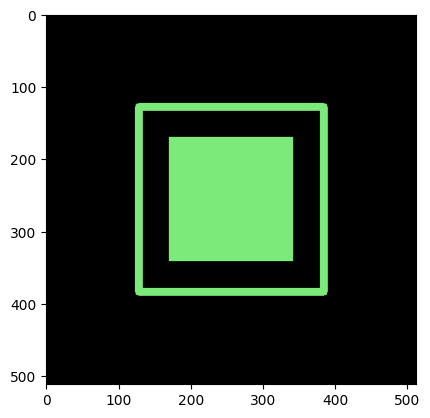

In [10]:
pt1 = (512 // 4, 512 // 4)
pt2 = (3 * 512 // 4, 3 * 512 // 4)
cv2.rectangle(blank, pt1=pt1, pt2=pt2, color=(123, 234, 123), thickness=10)
plt.imshow(blank)
plt.show()

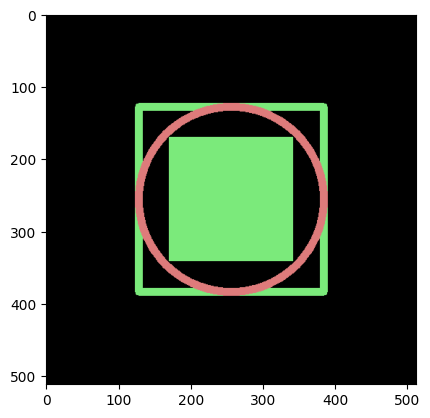

In [11]:
cv2.circle(blank, center=(256, 256), radius=128, color=(222, 123, 123), thickness=10)
plt.imshow(blank)
plt.show()

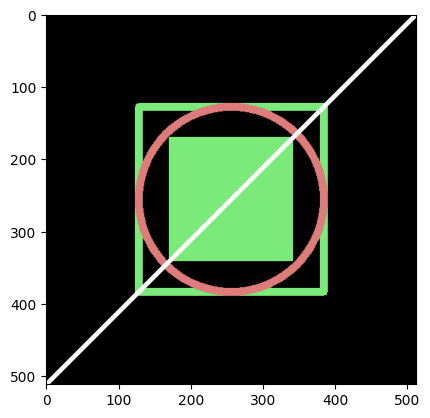

In [12]:
cv2.line(blank, pt1=(512, 0), pt2=(0, 512), color=(255, 255, 255), thickness=5)
plt.imshow(blank)
plt.show()

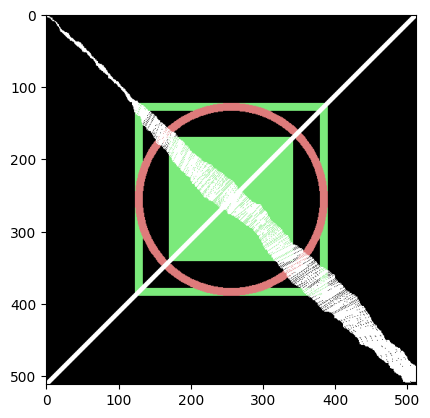

In [13]:
# Random walking lines.
np.random.seed(42)
n_points = 1024

points1 = np.cumsum(np.random.randint(0, 2, (n_points, 2)), axis=0)
points2 = np.cumsum(np.random.randint(0, 2, (n_points, 2)), axis=0)

for pt1, pt2 in zip(points1, points2):
    cv2.line(blank, tuple(pt1), tuple(pt2), color=(255, 255, 255), thickness=1)

plt.imshow(blank)
plt.show()

In [14]:
help(cv2.putText)

Help on built-in function putText:

putText(...)
    putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
    .   @brief Draws a text string.
    .
    .   The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered
    .   using the specified font are replaced by question marks. See #getTextSize for a text rendering code
    .   example.
    .
    .   @param img Image.
    .   @param text Text string to be drawn.
    .   @param org Bottom-left corner of the text string in the image.
    .   @param fontFace Font type, see #HersheyFonts.
    .   @param fontScale Font scale factor that is multiplied by the font-specific base size.
    .   @param color Text color.
    .   @param thickness Thickness of the lines used to draw a text.
    .   @param lineType Line type. See #LineTypes
    .   @param bottomLeftOrigin When true, the image data origin is at the bottom-left corner. Otherwise,
    .   i

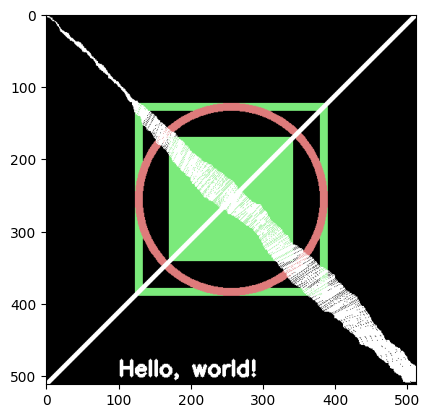

In [15]:
cv2.putText(
    blank,
    text="Hello, world!",
    org=(100, 500),
    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
    fontScale=1,
    color=(255, 255, 255),
    thickness=3,
)
plt.imshow(blank)
plt.show()

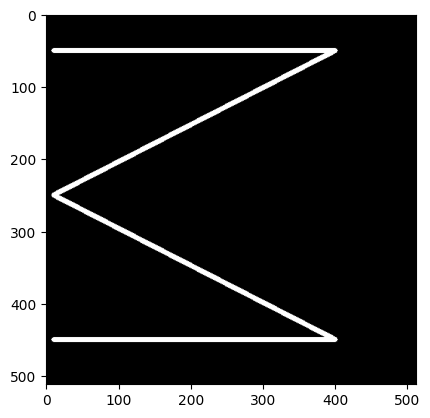

In [16]:
blank = np.zeros((512, 512, 3), dtype="uint8")
pts = np.array([[10, 50], [400, 50], [10, 250], [400, 450], [10, 450]], dtype="int32")
pts = pts.reshape(-1, 1, 2)
cv2.polylines(blank, [pts], isClosed=False, color=(255, 255, 255), thickness=5)
plt.imshow(blank)
plt.show()

## **3. Mouse Drawing**

In [20]:
# Drawing circles with mouse clicks.
blank = np.zeros((512, 512, 3), dtype="uint8")
winname = "Blank"


def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(blank, (x, y), 50, (255, 255, 255), thickness=cv2.FILLED)


cv2.namedWindow(winname)
cv2.setMouseCallback(winname, draw_circle)

while True:
    cv2.imshow(winname, blank)
    key = cv2.waitKey(1)  # Wait 1 ms for a key press and return ASCII value of that key.
    if key == ord("q"):
        break

cv2.destroyAllWindows()

In [4]:
# Drawing rectangles with mouse movements.
blank = np.zeros((512, 512, 3), dtype="uint8")
winname = "Blank"


def draw_rect():
    drawing, ix, iy = False, -1, -1

    def draw(event, x, y, flags, param):
        nonlocal drawing, ix, iy
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing, ix, iy = True, x, y
        if event == cv2.EVENT_MOUSEMOVE and drawing:
            cv2.rectangle(blank, (ix, iy), (x, y), (255, 255, 255), thickness=cv2.FILLED)
        if event == cv2.EVENT_LBUTTONUP:
            drawing = False
            cv2.rectangle(blank, (ix, iy), (x, y), (255, 255, 255), thickness=cv2.FILLED)

    return draw


cv2.namedWindow(winname)
cv2.setMouseCallback(winname, draw_rect())

while True:
    cv2.imshow(winname, blank)
    key = cv2.waitKey(1)  # Wait 1 ms for a key press and return ASCII value of that key.
    if key == ord("q"):
        break

cv2.destroyAllWindows()

In [2]:
# Pencil drawing with mouse movements.
from collections import deque

blank = np.zeros((512, 512, 3), dtype="uint8")
winname = "Blank"


def draw_line():
    drawing = False
    points = deque(maxlen=2)

    def draw(event, x, y, flags, param):
        nonlocal drawing
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
        if event == cv2.EVENT_MOUSEMOVE and drawing:
            points.append((x, y))
            pts = np.asarray(points, dtype="int32").reshape(-1, 1, 2)
            cv2.polylines(blank, [pts], isClosed=True, color=(255, 255, 255), thickness=2)
        if event == cv2.EVENT_LBUTTONUP:
            drawing = False
            points.clear()

    return draw


cv2.namedWindow(winname)
cv2.setMouseCallback(winname, draw_line())

while True:
    cv2.imshow(winname, blank)
    key = cv2.waitKey(1)  # Wait 1 ms for a key press and return ASCII value of that key.
    if key == ord("q"):
        break

cv2.destroyAllWindows()